In [53]:
import numpy as np
import QuantLib as ql
import matplotlib.pyplot as plt

# def handled_input(output:str, isInt = False):
#     s = input(output)
#     while True:
#         try:
#             if isInt:
#                 s = int(s)
#             else:
#                 s = float(s)
#             if s < 0:
#                 s = input(output)
#                 continue
#             break
#         except ValueError:
#             s = input('Wring input.' + output)
#     return s
# def np_cal(mu):
#     return 1/2 * (1 + math.erf(mu / (2**0.5)))

In [54]:
# # Input

# S = handled_input('Current stock price:')
# v = handled_input('Volatility:')
# n = handled_input('Times of dividends paid per year :', isInt = True)
# while n > 4:
#     n = handled_input('Times of dividends paid per year (4 times at most):', isInt = True)
# d = handled_input('Dividend per payment:')
# r =  handled_input('Rate of return (%):')/100
# X = handled_input('Strike Price:')
# m = handled_input('Maturing time (in month):', isInt = True) / 12

In [55]:
sigma = 0.1
a = 0.1
timestep = 360
length = 30 # in years
forward_rate = 0.05
day_count = ql.Thirty360()
todays_date = ql.Date(12, 5, 2020)

# State Variables
dt = 0.01
mu = 0.01*dt # Rendite pro Zeiteinheit
sigma = 0.1
S0 = 100
np.random.seed(1204)
num_paths = 10

In [56]:
ql.Settings.instance().evaluationDate = todays_date

spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

In [57]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

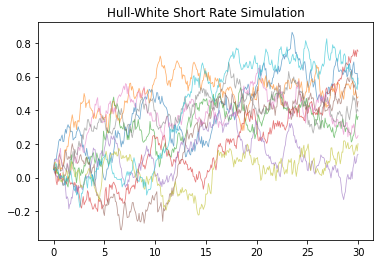

In [58]:
time, sr_paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, sr_paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

In [59]:
def genBrownPath (T, mu, sigma, S0, dt):
    S = []
    n = round(T/dt)
#     t = np.linspace(0, T, n)
#     W = [0] + np.random.standard_normal(size = 1) 
#     W = (W + np.random.standard_normal(size = 1))*np.sqrt(dt)
    W = [0] + np.random.standard_normal(size = n) 
    W = np.cumsum(W)*np.sqrt(dt) # == standard brownian motion
    for i in range(len(time)):
        X = (mu[i]-0.5*sigma**2)*time[i]+ sigma*W 
        S.append(S0*np.exp(X)) # == geometric brownian motion
    plt.plot(time, S)
    return S

KeyboardInterrupt: 

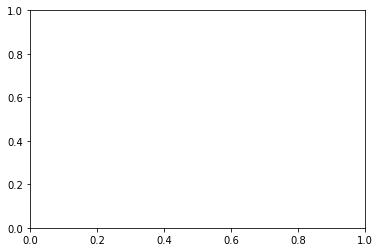

In [60]:
p_paths = []
for i in range(num_paths):
    p_paths.append(genBrownPath(timestep, sr_paths[i, :], sigma, S0, dt))
plt.title('Stock Price Simulation')
plt.show()

In [ ]:
payoff = [p_paths[i][timestep] - X for i in range(num_paths)]

In [ ]:
# Output
call = np.mean([max(payoff[i], 0) + np.exp(-1.0*r*i) * X for i in range(num_paths)])
put = np.mean([max(-payoff[i], 0) + np.exp(-1.0*r*i) * X for i in range(num_paths)])

print('Put value is ' + str(round(put, 3)) + '.')
print('Call value is ' + str(round(call, 3)) + '.')